In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu

In [2]:
df_data=pd.read_excel('Новый диплом датасет.xlsx',sheet_name='Данные', parse_dates = [3])

In [3]:
print (df_data.dtypes)

id_order                int64
id_client             float64
amt_payment           float64
dtime_pay      datetime64[ns]
dtype: object


In [4]:
#Поиск пустых значений
print("Данные:")
print(df_data.isnull().sum())

Данные:
id_order          0
id_client       588
amt_payment    2144
dtime_pay      2161
dtype: int64


In [5]:
df_data = df_data.dropna(subset=['id_client','amt_payment', 'dtime_pay'])

print("Данные:")
print(df_data.isnull().sum())


Данные:
id_order       0
id_client      0
amt_payment    0
dtime_pay      0
dtype: int64


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35828 entries, 0 to 37988
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_order     35828 non-null  int64         
 1   id_client    35828 non-null  float64       
 2   amt_payment  35828 non-null  float64       
 3   dtime_pay    35828 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.4 MB


In [7]:
min_date = df_data['dtime_pay'].min()
print( min_date)

1900-01-01 06:52:25.434000


#### оказалось много дат с годом 1900

In [8]:
df_year_1900 = df_data[df_data['dtime_pay'].dt.year == 1900]


In [9]:
df_data = df_data[~df_data['dtime_pay'].isin(df_year_1900['dtime_pay'])]

In [10]:
min_date = df_data['dtime_pay'].min()
print( min_date)

2022-06-03 17:48:54.432000


In [11]:
df_clients=pd.read_excel('Новый диплом датасет.xlsx',sheet_name='Clients')

In [12]:
df_clients.head(10)

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015
5,254313,2022-06-19 22:18:01.770,1,453
6,195818,2022-07-16 01:30:59.088,1,2652
7,267165,2022-06-25 09:54:06.470,0,866
8,246645,2022-07-03 22:13:08.299,0,1099
9,274394,2022-06-25 00:46:07.492,1,2652


In [13]:
#Поиск пустых значений
print("\nClients:")
print(df_clients.isnull().sum())


Clients:
id_client             0
dtime_ad            249
nflag_test            0
id_trading_point      0
dtype: int64


In [14]:
df_clients = df_clients.dropna(subset=['dtime_ad'])
print(df_clients.isnull().sum())

id_client           0
dtime_ad            0
nflag_test          0
id_trading_point    0
dtype: int64


In [15]:
df_regions=pd.read_excel('Новый диплом датасет.xlsx',sheet_name='Region_dict')

In [16]:
df_regions.head(10)

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир
5,13,Нижний Новгород
6,19,Тюмень
7,23,Великий Новгород
8,26,Ростов-на-Дону
9,33,Самара


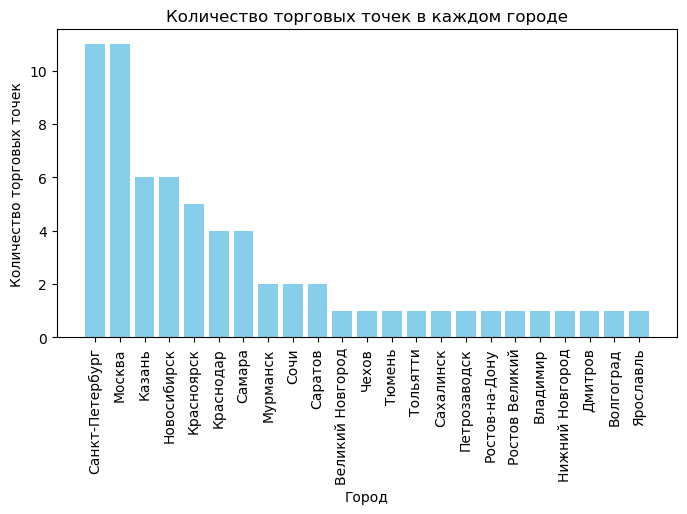

In [17]:
trading_points = df_regions.groupby('city').count()['id_trading_point'].reset_index().sort_values(by = 'id_trading_point', ascending = False)
trading_points = trading_points.rename(columns={'id_trading_point': 'count_trading_points'})

plt.figure(figsize=(8, 4))
plt.bar(trading_points['city'], trading_points['count_trading_points'], color='skyblue')
plt.xlabel('Город')
plt.ylabel('Количество торговых точек')
plt.title('Количество торговых точек в каждом городе')
plt.xticks(rotation=90)
plt.show()

In [18]:
aggregated_payments = df_data.groupby('id_client')['amt_payment'].sum().reset_index()

In [19]:
aggregated_payments.head(10)

,id_client,amt_payment
0,178561.0,3052.0
1,178562.0,2439.0
2,178563.0,768.0
3,178565.0,958.0
4,178566.0,5474.0
5,178567.0,2663.0
6,178568.0,13537.0
7,178569.0,2008.0
8,178570.0,6651.0
9,178571.0,3063.0


In [20]:
#Проверяем, что в новой таблице остались все клиенты из клиентской таблицы.
df_merged = df_clients.merge(aggregated_payments, on='id_client', how='left')

print("Количество клиентов до объединения:", len(df_clients))
print("Количество клиентов после объединения:", len(df_merged))


Количество клиентов до объединения: 55356
Количество клиентов после объединения: 55356


In [21]:
df_merged.head(10)

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment
0,180844,2022-06-08 18:38:41.414,0,212,5349.0
1,226069,2022-07-11 16:28:38.511,1,54,NaN
2,183981,2022-06-16 12:23:59.289,1,991,6322.0
3,322530,2022-07-08 08:56:08.714,0,1015,NaN
4,254313,2022-06-19 22:18:01.770,1,453,NaN
5,195818,2022-07-16 01:30:59.088,1,2652,4021.0
6,267165,2022-06-25 09:54:06.470,0,866,NaN
7,246645,2022-07-03 22:13:08.299,0,1099,NaN
8,274394,2022-06-25 00:46:07.492,1,2652,NaN
9,200225,2022-07-27 00:18:47.370,0,453,4372.0


In [23]:
df_merged['amt_payment'].fillna(0, inplace=True)

In [24]:
df_merged = df_merged.merge(df_regions[['id_trading_point', 'city']], on='id_trading_point', how='left')

In [25]:
df_merged['payment_flag'] = (df_merged['amt_payment'] > 0).astype(int)

In [26]:
df_merged.head(10)

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,payment_flag
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,226069,2022-07-11 16:28:38.511,1,54,0.0,Мурманск,0
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань,1
3,322530,2022-07-08 08:56:08.714,0,1015,0.0,Краснодар,0
4,254313,2022-06-19 22:18:01.770,1,453,0.0,Санкт-Петербург,0
5,195818,2022-07-16 01:30:59.088,1,2652,4021.0,Москва,1
6,267165,2022-06-25 09:54:06.470,0,866,0.0,Новосибирск,0
7,246645,2022-07-03 22:13:08.299,0,1099,0.0,Краснодар,0
8,274394,2022-06-25 00:46:07.492,1,2652,0.0,Москва,0
9,200225,2022-07-27 00:18:47.370,0,453,4372.0,Санкт-Петербург,1


In [27]:
from scipy.stats import ttest_ind

In [28]:
def test_calc(r1, r2, alpha = 0.05):
    
    s,p = ttest_ind(r1,r2)
    
    if p < alpha:
        print("Существует статистически значимая разница между средними")
    else:
        print("Нет статистически значимой разницы между средними")
    
 
    print("Разница средних = ", r1.mean()-r2.mean())
    print("P_value = ",p)
    return s, p


In [29]:
def mann_whitney_func(r1, r2, alpha=.05):
    
    s, p = mannwhitneyu(r1, r2)
    
    if p < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
    
    print("P_value = ",p)
    return s, p


In [30]:
zero_payment_trading_points = []

for trading_point in df_merged['id_trading_point'].unique():
    test = df_merged[(df_merged['id_trading_point'] == trading_point) & (df_merged['nflag_test'] == 1)]['amt_payment'].sum()
    control = df_merged[(df_merged['id_trading_point'] == trading_point) & (df_merged['nflag_test'] == 0)]['amt_payment'].sum()

    if test == 0 or control == 0:
        zero_payment_trading_points.append(trading_point)

In [31]:
zero_payment_trading_points

[1015, 866, 1099, 739, 46, 228, 26, 603, 810, 800, 7, 23, 4, 1, 13]

In [32]:
empty_group_trading_points = []

for trading_point in df_merged['id_trading_point'].unique():
    group_values = df_merged[df_merged['id_trading_point'] == trading_point]['nflag_test'].unique()
    test = df_merged[(df_merged['id_trading_point'] == trading_point) & (df_merged['nflag_test'] == 1)].count()['id_client']
    control = df_merged[(df_merged['id_trading_point'] == trading_point) & (df_merged['nflag_test'] == 0)].count()['id_client']

    if test == 0 or control == 0:
        empty_group_trading_points.append(trading_point)

In [33]:
empty_group_trading_points

[1015, 866, 1099, 739, 228, 603, 810, 800]

In [34]:
# Объединяем списки
excluded_trading_points = set(zero_payment_trading_points + empty_group_trading_points)

filtered_df_merged = df_merged[~df_merged['id_trading_point'].isin(excluded_trading_points)]

In [35]:
filtered_df_merged.head(10)

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,payment_flag
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,226069,2022-07-11 16:28:38.511,1,54,0.0,Мурманск,0
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань,1
4,254313,2022-06-19 22:18:01.770,1,453,0.0,Санкт-Петербург,0
5,195818,2022-07-16 01:30:59.088,1,2652,4021.0,Москва,1
8,274394,2022-06-25 00:46:07.492,1,2652,0.0,Москва,0
9,200225,2022-07-27 00:18:47.370,0,453,4372.0,Санкт-Петербург,1
12,212625,2022-08-16 14:19:05.040,0,278,0.0,Красноярск,0
13,201373,2022-07-29 22:27:46.612,1,6543,5009.0,Москва,1
14,287462,2022-07-13 12:13:50.168,1,699,0.0,Казань,0


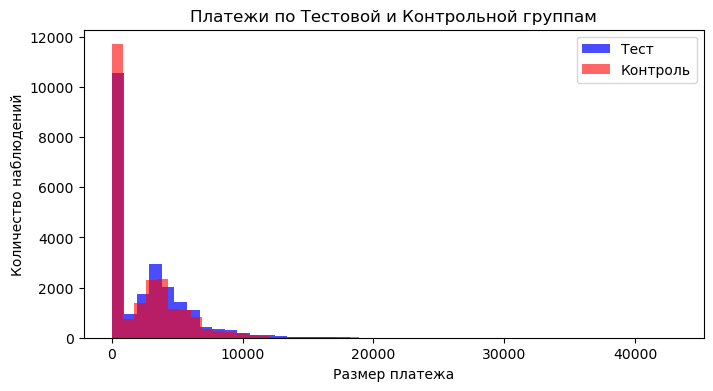

In [36]:
test_payments = filtered_df_merged[filtered_df_merged['nflag_test'] == 1]['amt_payment']
control_payments = filtered_df_merged[filtered_df_merged['nflag_test'] == 0]['amt_payment']

plt.figure(figsize=(8, 4))
plt.hist(test_payments, alpha=0.7, bins=45, label='Тест', color='b')
plt.hist(control_payments, alpha=0.6, bins=45, label='Контроль', color='r')

plt.title('Платежи по Тестовой и Контрольной группам')
plt.xlabel('Размер платежа')
plt.ylabel('Количество наблюдений')
plt.legend(loc='upper right')

plt.show()


In [63]:
#сравниваем средние платежи
test_calc(test_payments, control_payments)

Существует статистически значимая разница между средними
Разница средних =  263.088912844727
P_value =  3.3214645838934018e-21


(9.456798235171377, 3.3214645838934018e-21)

In [64]:
#сравниваем конверсию в платеж
test_calc(filtered_df_merged[filtered_df_merged['nflag_test']==1]['payment_flag'], filtered_df_merged[filtered_df_merged['nflag_test']==0]['payment_flag'])

Существует статистически значимая разница между средними
Разница средних =  0.043524040271688325
P_value =  1.7338073027564523e-20


(9.282032730948323, 1.7338073027564523e-20)

In [65]:
mann_whitney_func(test_payments, control_payments)

Распределения не равны
P_value =  3.008345273971901e-24


(270040116.0, 3.008345273971901e-24)

In [66]:
moscow_df = filtered_df_merged[filtered_df_merged['city'] == 'Москва']

In [67]:
moscow_df

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,payment_flag
5,195818,2022-07-16 01:30:59.088,1,2652,4021.0,Москва,1
8,274394,2022-06-25 00:46:07.492,1,2652,0.0,Москва,0
13,201373,2022-07-29 22:27:46.612,1,6543,5009.0,Москва,1
16,205352,2022-08-08 20:59:32.806,0,2652,0.0,Москва,0
29,185585,2022-06-20 12:40:52.026,0,2652,0.0,Москва,0
...,...,...,...,...,...,...,...
55309,193774,2022-07-10 21:45:57.683,0,9121,5851.0,Москва,1
55322,200450,2022-07-27 13:37:21.523,0,2212,2989.0,Москва,1
55329,273340,2022-07-19 11:15:52.553,1,1654,0.0,Москва,0
55333,240483,2022-06-17 09:55:25.649,1,1287,0.0,Москва,0


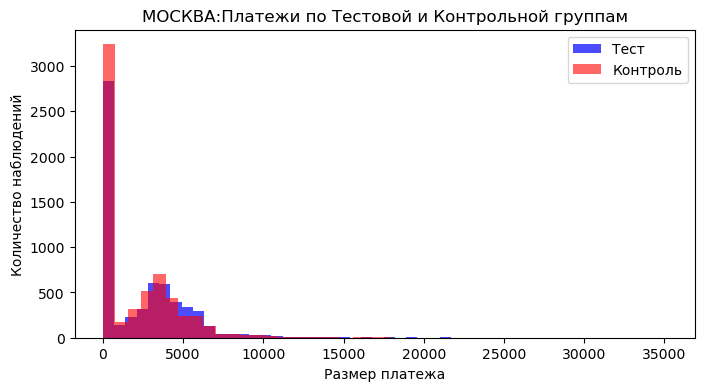

In [68]:
test_payments_moscow = moscow_df[moscow_df['nflag_test'] == 1]['amt_payment']
control_payments_moscow = moscow_df[moscow_df['nflag_test'] == 0]['amt_payment']

plt.figure(figsize=(8, 4))
plt.hist(test_payments_moscow, alpha=0.7, bins=45, label='Тест', color='b')
plt.hist(control_payments_moscow, alpha=0.6, bins=45, label='Контроль', color='r')

plt.title('МОСКВА:Платежи по Тестовой и Контрольной группам')
plt.xlabel('Размер платежа')
plt.ylabel('Количество наблюдений')
plt.legend(loc='upper right')

plt.show()

In [69]:
#сравниваем средние платежи
test_calc(test_payments_moscow, control_payments_moscow)

Существует статистически значимая разница между средними
Разница средних =  381.7784892750842
P_value =  1.757549439555765e-14


(7.676511027843395, 1.757549439555765e-14)

In [73]:
#сравниваем конверсию в платеж
test_calc(moscow_df[moscow_df['nflag_test']==1]['payment_flag'], moscow_df[moscow_df['nflag_test']==0]['payment_flag'])

Существует статистически значимая разница между средними
Разница средних =  0.05557800593933432
P_value =  6.194689260032594e-10


(6.190312288026295, 6.194689260032594e-10)

In [74]:
mann_whitney_func(test_payments_moscow, control_payments_moscow)

Распределения не равны
P_value =  7.010591402203484e-16


(20595574.5, 7.010591402203484e-16)

In [75]:
spb_df = filtered_df_merged[filtered_df_merged['city'] == 'Санкт-Петербург']

In [76]:
spb_df

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,payment_flag
4,254313,2022-06-19 22:18:01.770,1,453,0.0,Санкт-Петербург,0
9,200225,2022-07-27 00:18:47.370,0,453,4372.0,Санкт-Петербург,1
15,205357,2022-08-08 21:22:23.684,0,453,2818.0,Санкт-Петербург,1
26,248371,2022-08-02 01:44:51.638,0,112,0.0,Санкт-Петербург,0
30,277149,2022-07-15 01:31:37.312,0,394,0.0,Санкт-Петербург,0
...,...,...,...,...,...,...,...
55343,204576,2022-08-06 22:36:40.980,1,576,3552.0,Санкт-Петербург,1
55344,186456,2022-06-22 16:06:03.632,0,117,9217.0,Санкт-Петербург,1
55349,260405,2022-08-15 02:47:58.960,0,576,0.0,Санкт-Петербург,0
55350,188702,2022-06-28 06:16:25.664,0,453,1323.0,Санкт-Петербург,1


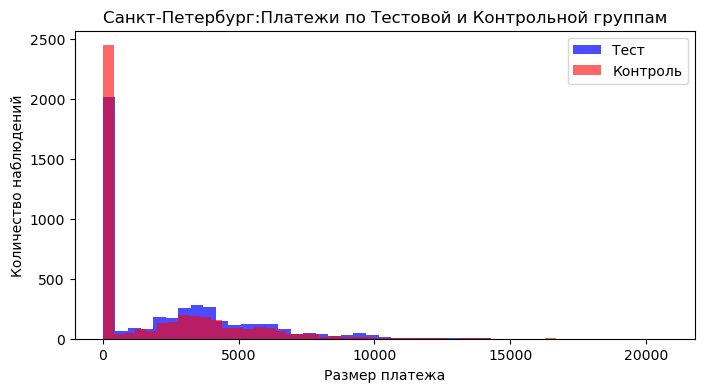

In [77]:
test_payments_spb = spb_df[spb_df['nflag_test'] == 1]['amt_payment']
control_payments_spb = spb_df[spb_df['nflag_test'] == 0]['amt_payment']

plt.figure(figsize=(8, 4))
plt.hist(test_payments_spb, alpha=0.7, bins=45, label='Тест', color='b')
plt.hist(control_payments_spb, alpha=0.6, bins=45, label='Контроль', color='r')

plt.title('Санкт-Петербург:Платежи по Тестовой и Контрольной группам')
plt.xlabel('Размер платежа')
plt.ylabel('Количество наблюдений')
plt.legend(loc='upper right')

plt.show()

In [78]:
#сравниваем средние платежи
test_calc(test_payments_spb, control_payments_spb)

Существует статистически значимая разница между средними
Разница средних =  513.9039043833998
P_value =  2.3198088937974163e-18


(8.759635784179547, 2.3198088937974163e-18)

In [79]:
#сравниваем конверсию в платеж
test_calc(spb_df[spb_df['nflag_test']==1]['payment_flag'], spb_df[spb_df['nflag_test']==0]['payment_flag'])

Существует статистически значимая разница между средними
Разница средних =  0.09877797751600403
P_value =  1.065825659919673e-20


(9.352468686561785, 1.065825659919673e-20)

In [80]:
mann_whitney_func(test_payments_spb, control_payments_spb)

Распределения не равны
P_value =  2.0392184217953754e-20


(10899685.5, 2.0392184217953754e-20)

##### ВЫВОД по Москве и Санкт-Петербургу: Существует статистически значимая разница между средними платежами в тестовой и контрольной группах. 
##### Средний платеж в тестовой группе значительно выше.
##### Конверсия в платеж выше в тестовой группе.
##### Распределения платежей в тестовой и контрольной группах неодинаковы.
##### То есть воздействие "тест" приводит к увеличению как среднего размера платежа, так и конверсии в платеж по сравнению с воздействием "контроль" 

In [81]:
#Анализ по другим городам

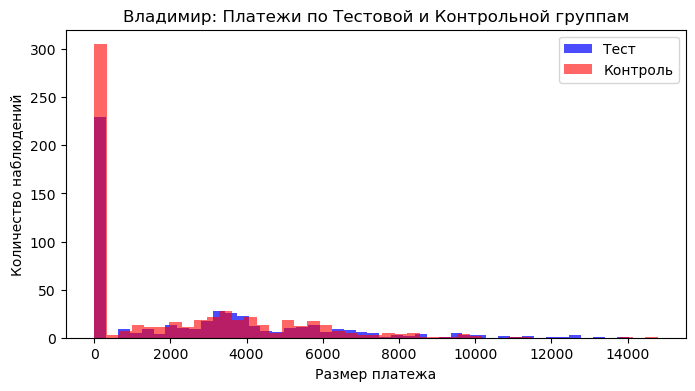

Существует статистически значимая разница между средними
Разница средних =  438.6098419243094
P_value =  0.010095112170351712
Распределения не равны
P_value =  0.03166761411886426


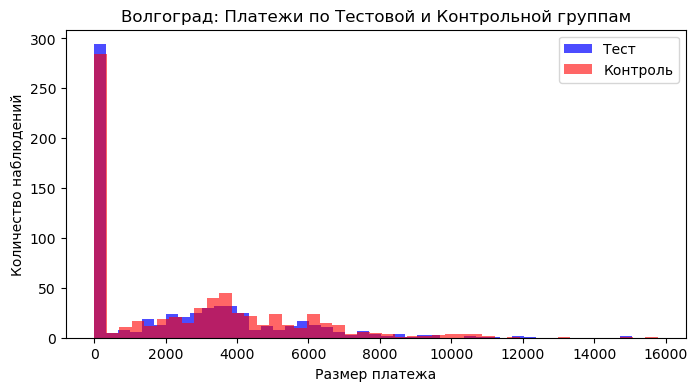

Существует статистически значимая разница между средними
Разница средних =  -312.89040013337035
P_value =  0.03686899928098654
Распределения не равны
P_value =  0.03323940159324537


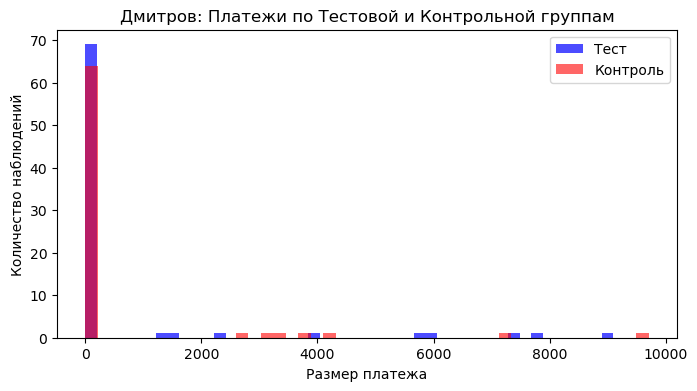

Нет статистически значимой разницы между средними
Разница средних =  95.88262910798124
P_value =  0.7410763125801646
Распределения равны
P_value =  0.7422551789442879


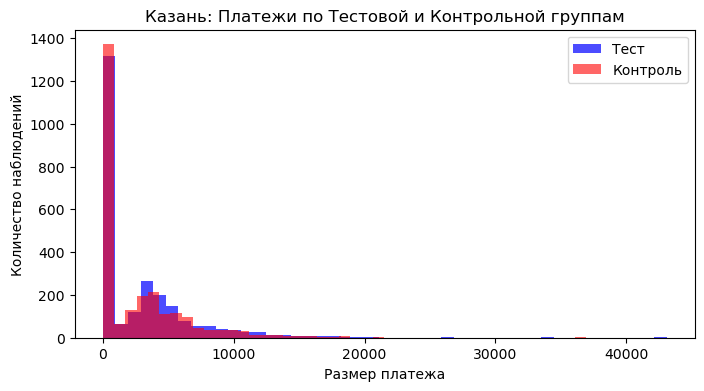

Нет статистически значимой разницы между средними
Разница средних =  121.22480263872694
P_value =  0.286688049247618
Распределения равны
P_value =  0.37726004167062477


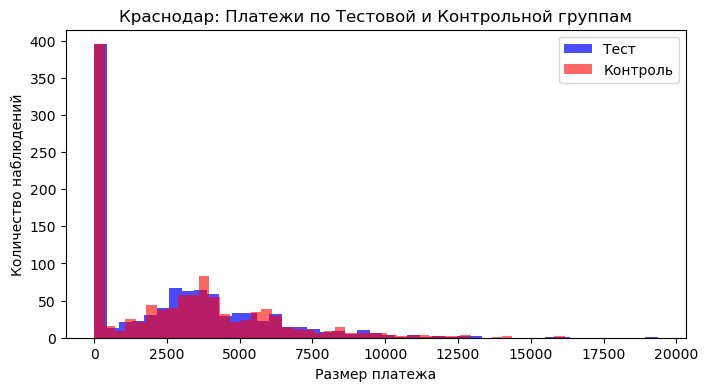

Нет статистически значимой разницы между средними
Разница средних =  -215.62639239464443
P_value =  0.085800112916198
Распределения равны
P_value =  0.05938101983441801


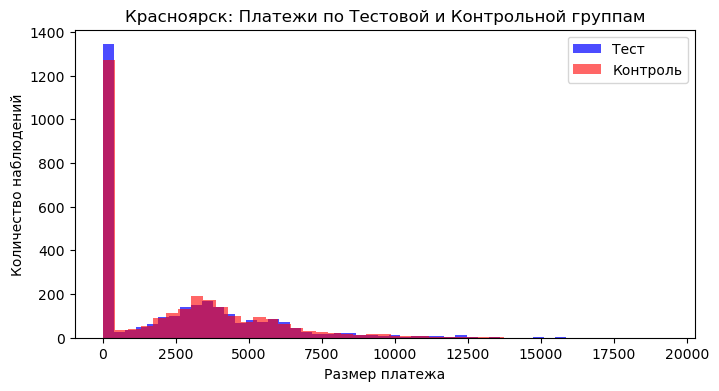

Нет статистически значимой разницы между средними
Разница средних =  8.718297889251062
P_value =  0.9044823881233125
Распределения равны
P_value =  0.8770469886251647


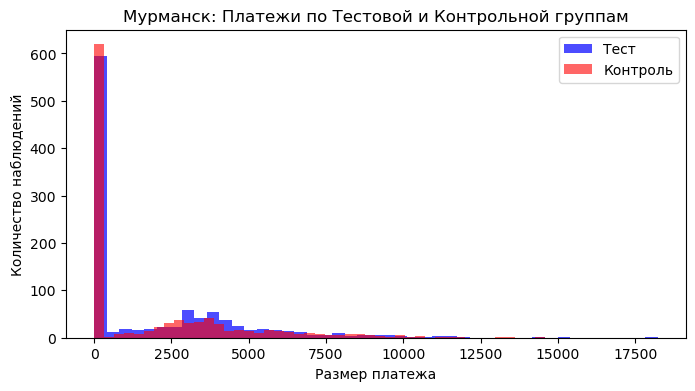

Нет статистически значимой разницы между средними
Разница средних =  8.051371737534055
P_value =  0.9449762446327565
Распределения равны
P_value =  0.5434251528583327


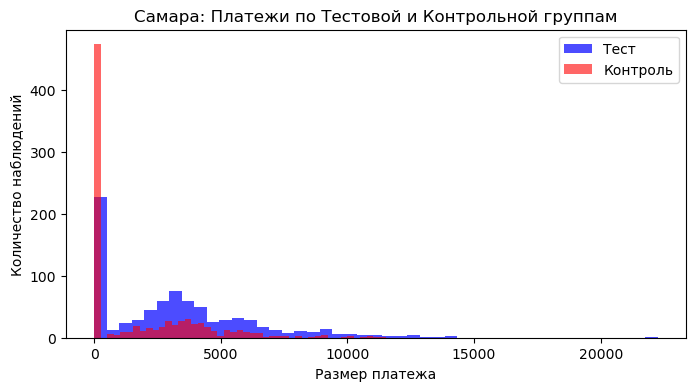

Существует статистически значимая разница между средними
Разница средних =  1544.3720191247648
P_value =  1.1014020778472052e-29
Распределения не равны
P_value =  4.325201867794148e-30


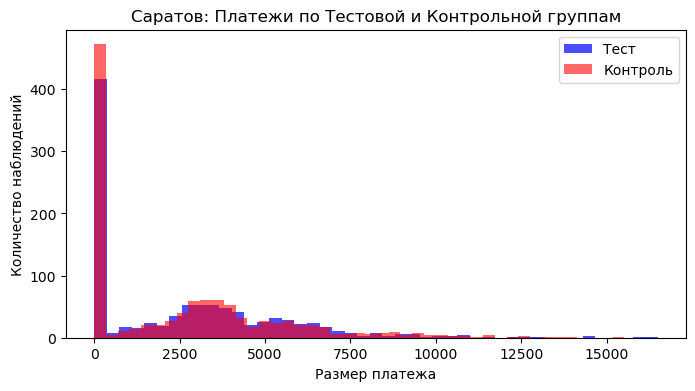

Нет статистически значимой разницы между средними
Разница средних =  -12.85688039258821
P_value =  0.9162512798549167
Распределения равны
P_value =  0.7833257779753139


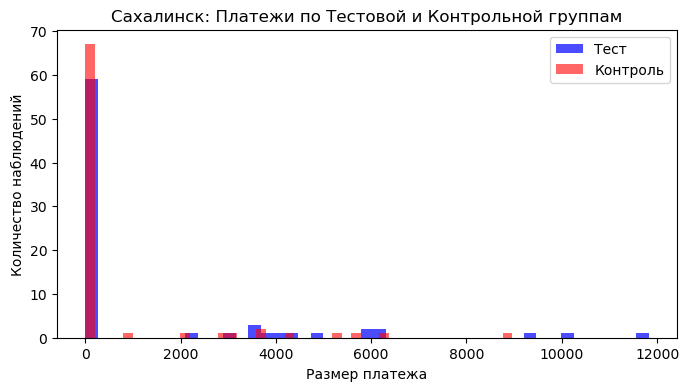

Нет статистически значимой разницы между средними
Разница средних =  571.2994871794872
P_value =  0.10580921254927302
Распределения равны
P_value =  0.19868569514015844


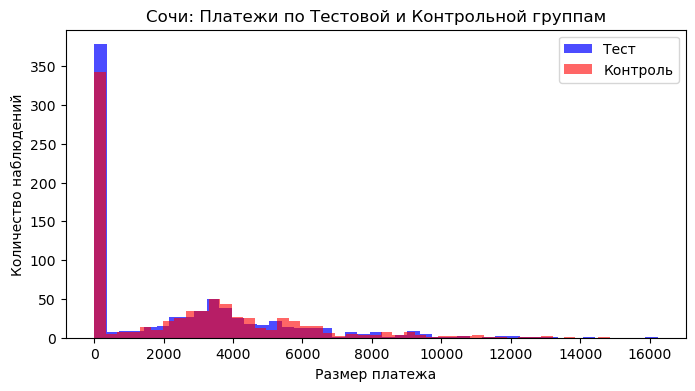

Нет статистически значимой разницы между средними
Разница средних =  -217.2514838460288
P_value =  0.12297605685687812
Распределения равны
P_value =  0.05698257474271896


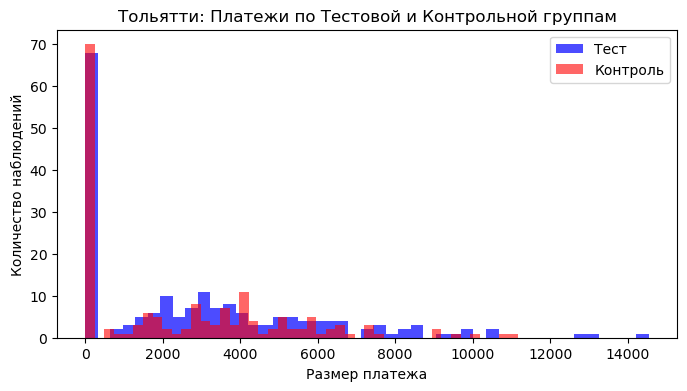

Нет статистически значимой разницы между средними
Разница средних =  462.9494484714778
P_value =  0.1333273246710206
Распределения равны
P_value =  0.22134177144014489


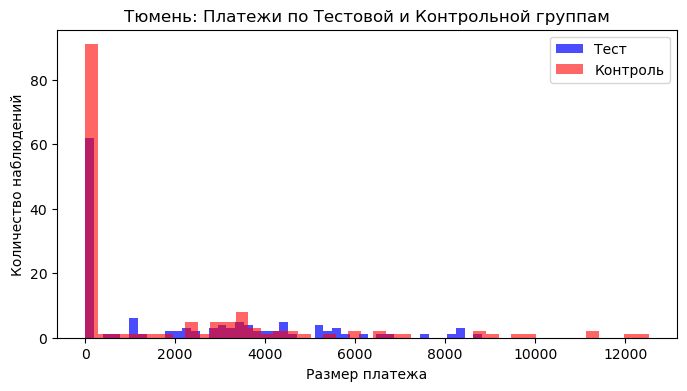

Нет статистически значимой разницы между средними
Разница средних =  300.4463645943099
P_value =  0.3550227648604757
Распределения не равны
P_value =  0.038066216007540725


In [85]:
def analyze_city(city_df):
    test_payments_city = city_df[city_df['nflag_test'] == 1]['amt_payment']
    control_payments_city = city_df[city_df['nflag_test'] == 0]['amt_payment']

    plt.figure(figsize=(8, 4))
    plt.hist(test_payments_city, alpha=0.7, bins=45, label='Тест', color='b')
    plt.hist(control_payments_city, alpha=0.6, bins=45, label='Контроль', color='r')

    plt.title(f'{city_df["city"].iloc[0]}: Платежи по Тестовой и Контрольной группам')
    plt.xlabel('Размер платежа')
    plt.ylabel('Количество наблюдений')
    plt.legend(loc='upper right')

    plt.show()

    test_result = test_calc(test_payments_city, control_payments_city)
    mann_whitney_result = mann_whitney_func(test_payments_city, control_payments_city)

    return test_result,mann_whitney_result

# Пройдем циклом по всем оставшимся городам и выполним анализ
remaining_cities = filtered_df_merged[~filtered_df_merged['city'].isin(['Москва', 'Санкт-Петербург'])]

for city,city_data in remaining_cities.groupby('city'):
    analyze_city(city_data)

   
  

In [88]:
report_rows = []

# Цикл по городам
for city, city_data in filtered_df_merged.groupby('city'):
    # Цикл по торговым точкам в каждом городе
    for trading_point, trading_point_data in city_data.groupby('id_trading_point'):
        count_test = trading_point_data['nflag_test'].sum()
        count_control = trading_point_data['nflag_test'].count() - count_test
        count_all = trading_point_data['nflag_test'].count()
        percent_count = count_all / filtered_df_merged['nflag_test'].count() * 100
        avg_payment_test = trading_point_data.loc[trading_point_data['nflag_test'] == 1, 'amt_payment'].mean()
        avg_payment_control = trading_point_data.loc[trading_point_data['nflag_test'] == 0, 'amt_payment'].mean()
        diff = avg_payment_test - avg_payment_control
        sigma_test = trading_point_data.loc[trading_point_data['nflag_test'] == 1, 'amt_payment'].std()
        sigma_control = trading_point_data.loc[trading_point_data['nflag_test'] == 0, 'amt_payment'].std()

        ttest, pvalue_ttest = ttest_ind(
            trading_point_data.loc[trading_point_data['nflag_test'] == 1, 'amt_payment'],
            trading_point_data.loc[trading_point_data['nflag_test'] == 0, 'amt_payment']
        )

        label = 'Positive' if (pvalue_ttest < 0.05) and (diff > 0) else \
                'Negative' if (pvalue_ttest < 0.05) and (diff < 0) else \
                'Neutral'

        new_row = {'city': city, 'id_trading_point': trading_point, 'count_test': count_test,
                   'count_control': count_control, 'count_all': count_all, 'percent_count': percent_count,
                   'avg_payment_test': avg_payment_test, 'avg_payment_control': avg_payment_control, 'diff': diff,
                   'sigma_test': sigma_test, 'sigma_control': sigma_control, 'ttest': ttest,
                   'pvalue_ttest': pvalue_ttest, 'label': label}

        report_rows.append(new_row)

report_df = pd.DataFrame(report_rows)

with pd.ExcelWriter('final_report.xlsx') as writer:
    report_df[report_df['label'] == 'Positive'].to_excel(writer, sheet_name='Положительные исходы', index=False)
    report_df[report_df['label'] == 'Negative'].to_excel(writer, sheet_name='Отрицательные исходы', index=False)
    report_df[report_df['label'] == 'Neutral'].to_excel(writer, sheet_name='Нейтральные исходы', index=False)
